#IMDB with CNN+LSTM
이번 노트북의 목표는 IMDB를 LSTM+CNN으로 학습하는것입니다.

IMDB 데이터셋은 인터넷 영화 데이터베이스로부터 가져온 양 극단의 리뷰 50,000개로 이루어져 있습니다.
데이터에 대한 자세한 설명은 
[IMDB] 3.4 파일에 정리했으므로 생략하겠습니다.


In [1]:
from keras.datasets import imdb
!pip install numpy==1.16.1 # specififed numpy version.
import numpy as np

# This instruction will occur error:not pickled. [SOLVE: using numpy version: 1.16.1]
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
Invalid requirement: '#'



5만개의 데이터셋을 각각 2만개의 데이터셋과 2만개의 트레이닝셋으로 구분하였습니다.

In [2]:
data_train = train_data[:20000]
label_train = train_labels[:20000]
data_val = train_data[20000:]
label_val = train_labels[20000:]

길이를 같게 패딩합니다.

In [3]:
from keras.preprocessing import sequence

data_train = sequence.pad_sequences(data_train, maxlen=200)
data_val = sequence.pad_sequences(data_val, maxlen=200)
test_data = sequence.pad_sequences(test_data, maxlen=200)

CNN+LSTM 모델을 정의합니다.

In [4]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

model = Sequential()
model.add(Embedding(10000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0805 00:02:50.850327 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 00:02:51.003618 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 00:02:51.042658 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 00:02:51.086628 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 00:02:51.100243 20384 deprecation.py:506

64개씩 미니 배치를 만들어 Epochs 25(총 25번 학습)로 20000개의 트레이팅셋의 학습을 시작합니다.

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(data_train, label_train, epochs=25, batch_size=64, validation_data=(data_val, label_val))

W0805 00:02:51.719110 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 00:02:51.746457 20384 deprecation_wrapper.py:119] From C:\Users\yhkim\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 00:02:51.754263 20384 deprecation.py:323] From C:\Users\yhkim\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 88s 4ms/step - loss: 0.4129 - acc: 0.7962 - val_loss: 0.3314 - val_acc: 0.8660
Epoch 2/25
20000/20000 [==============================] - 90s 5ms/step - loss: 0.2198 - acc: 0.9169 - val_loss: 0.3372 - val_acc: 0.8548
Epoch 3/25
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1381 - acc: 0.9503 - val_loss: 0.3821 - val_acc: 0.8626
Epoch 4/25
20000/20000 [==============================] - 89s 4ms/step - loss: 0.0903 - acc: 0.9712 - val_loss: 0.4810 - val_acc: 0.8624
Epoch 5/25
20000/20000 [==============================] - 92s 5ms/step - loss: 0.0552 - acc: 0.9829 - val_loss: 0.4882 - val_acc: 0.8526
Epoch 6/25
20000/20000 [==============================] - 86s 4ms/step - loss: 0.0397 - acc: 0.9862 - val_loss: 0.5808 - val_acc: 0.8582
Epoch 7/25
20000/20000 [==============================] - 82s 4ms/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.6894 - val_acc:

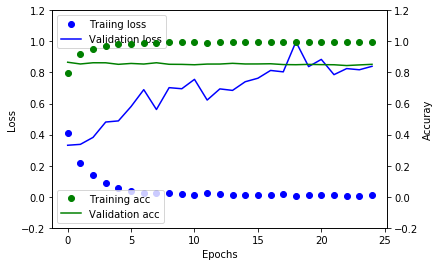

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'bo', label='Traiing loss')
loss_ax.plot(hist.history['val_loss'], 'b', label='Validation loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'go', label='Training acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='Validation acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

다른 지표들은 큰 차이를 보이지 않지만 훈련 손실이 에포크 초반 급격히 하락하는 것을 볼 수 있고
검증 손실이 급격히 증가하는걸 볼 수 있습니다. 이를 통해 에포크가 이루어질수록 과적화되어 특별하게 일반화 되기 어려운 것을 볼 수 있습니다.

In [9]:
result = model.evaluate(test_data, test_labels)
print(result)

25000/25000 [==============================] - 25s 980us/step
[0.915341448354125, 0.84452]


CNN+LSTM을 사용한 학습은 84.45%의 정확도를 달성했습니다.